# Face Mask Detection

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3),
    include_top=False, weights='imagenet'
)

In [3]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


Inserting own set of layers on top of InceptionV3.

In [12]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [13]:
import os
base='E:\\DataSets'
a=os.path.join(base, 'face-mask')
b=os.path.join(a, 'Train')
Train_Mirror=os.path.join(b, 'with_mask')
c=os.listdir( Train_Mirror )
Train_NoMirror=os.path.join(b, 'without_mask')
d=os.listdir( Train_NoMirror )

p=os.path.join(base, 'face-mask')
q=os.path.join(p, 'Test')
Test_Mirror=os.path.join(q, 'with_mask')
r=os.listdir( Test_Mirror )

Test_NoMirror=os.path.join(q, 'without_mask')
s=os.listdir( Test_NoMirror )

In [24]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 

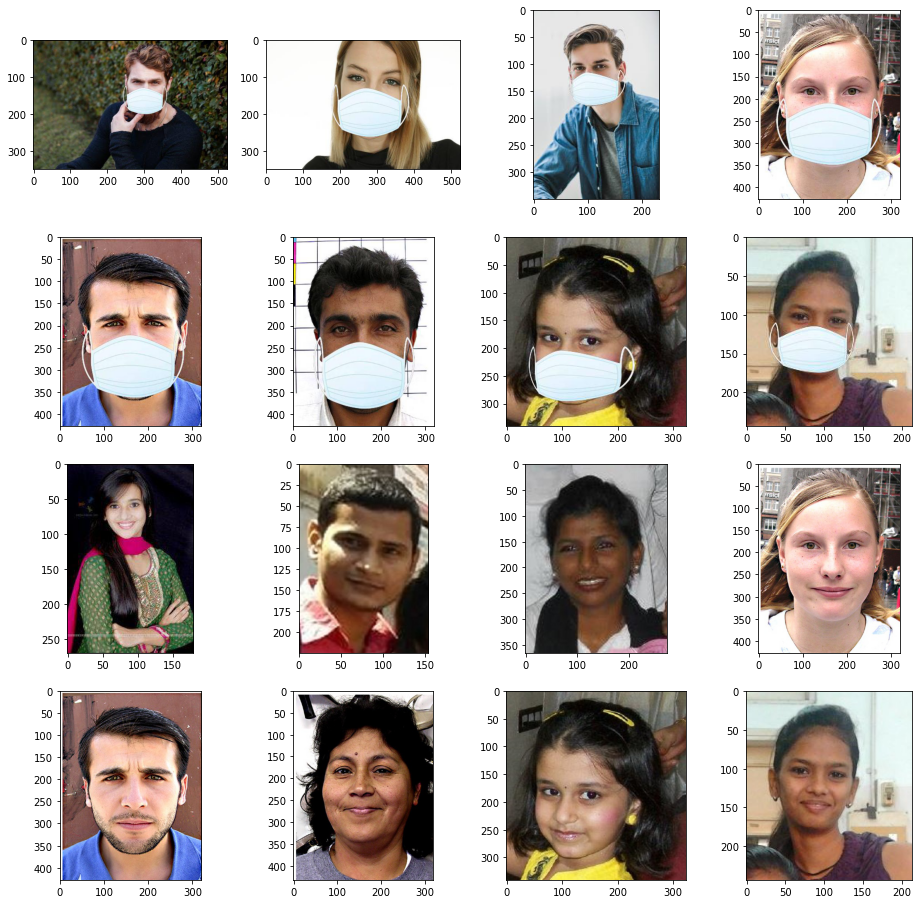

In [22]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_train_mirror_pix = [os.path.join(Train_Mirror, fname) 
                for fname in c[ pic_index-8:pic_index] 
               ]

next_train_No_mirror_pix = [os.path.join(Train_NoMirror, fname) 
                for fname in d[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_train_mirror_pix+next_train_No_mirror_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(b,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator =  test_datagen.flow_from_directory(q,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 816 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=5,
                              validation_steps=9,
                              verbose=1)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 12 steps, validate for 9 steps
Epoch 1/5
12/12 [==============================] - 564s 47s/step - loss: 1.0426 - accuracy: 0.6662 - val_loss: 0.2862 - val_accuracy: 0.8556: 4:13 - loss: 1.5132 - accurac
Epoch 2/5
12/12 [==============================] - 226s 19s/step - loss: 0.2853 - accuracy: 0.8949 - val_loss: 0.0205 - val_accuracy: 0.9944
Epoch 3/5
12/12 [==============================] - 233s 19s/step - loss: 0.1141 - accuracy: 0.9614 - val_loss: 0.0337 - val_accuracy: 0.9778
Epoch 4/5
12/12 [==============================] - 259s 22s/step - loss: 0.1271 - accuracy: 0.9495 - val_loss: 0.0590 - val_accuracy: 0.9722
Epoch 5/5
12/12 [==============================] - 212s 18s/step - loss: 0.0924 - accuracy: 0.9641 - val_loss: 0.0087 - val_accuracy: 1.0000


Text(0.5, 1.0, 'Training and validation loss')

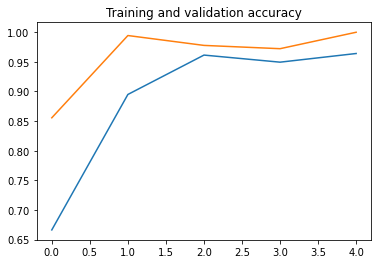

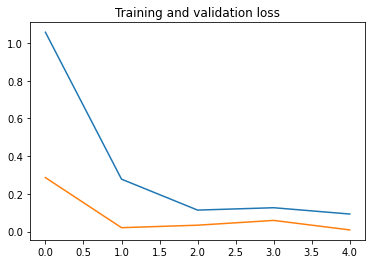

In [18]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [35]:
model.save("Face Mask TL.h5")

In [17]:
import keras
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Using TensorFlow backend.


# Predictions

[[0.00028624]]


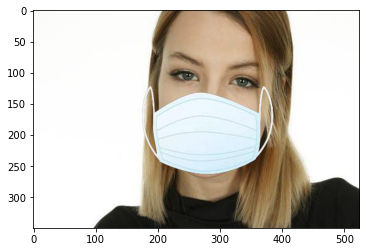

In [26]:
img = mpimg.imread('E:\\DataSets\\face-mask\\Test\\with_mask\\1-with-mask.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('E:\\DataSets\\face-mask\\Test\\with_mask\\1-with-mask.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

[[0.0001807]]


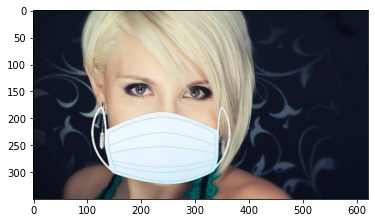

In [27]:
img = mpimg.imread('E:\\DataSets\\face-mask\\Test\\with_mask\\5-with-mask.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('E:\\DataSets\\face-mask\\Test\\with_mask\\5-with-mask.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

[[0.99995506]]


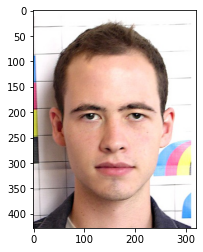

In [44]:
img = mpimg.imread('E:\\DataSets\\face-mask\\Test\\without_mask\\399.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('E:\\DataSets\\face-mask\\Test\\without_mask\\399.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)

[[0.99997056]]


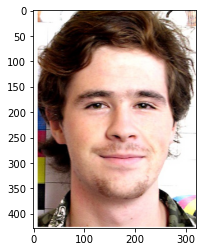

In [30]:
img = mpimg.imread('E:\\DataSets\\face-mask\\Test\\without_mask\\193.jpg')
imgplot = plt.imshow(img)

img = cv2.imread('E:\\DataSets\\face-mask\\Test\\without_mask\\193.jpg')

img = cv2.resize(img,(224,224))

img = np.reshape(img,[1,224,224,3])

img = img/255.0

classes = model.predict(img)
print(classes)